<a href="https://colab.research.google.com/github/saimedha12/ICP_3/blob/main/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q1: Import Libraries and Load Dataset
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split validation set (10%)
val_size = int(0.1 * len(x_train))
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Train:", x_train.shape, "Validation:", x_val.shape, "Test:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: (45000, 32, 32, 3) Validation: (5000, 32, 32, 3) Test: (10000, 32, 32, 3)


/tmp/ipython-input-2788760392.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


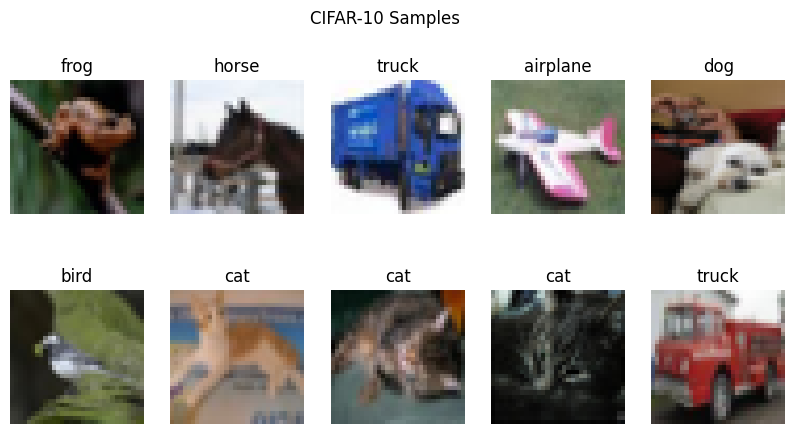

In [ ]:
# Q2: Visualize Dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("CIFAR-10 Samples")
plt.show()


In [ ]:
# Q3: Define and Train Baseline Model (LeNet5)

def build_lenet():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),  # ✅ Modern way to define input
        layers.Conv2D(6, (5,5), activation='tanh', padding='same'),
        layers.AveragePooling2D(pool_size=(2,2)),  # ✅ Added pool_size
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2)),  # ✅ Added pool_size
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train LeNet
lenet = build_lenet()
lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_lenet = lenet.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64)
end = time.time()

print(f"LeNet Training Time: {(end-start):.2f}s")


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 63ms/step - accuracy: 0.3127 - loss: 1.9169 - val_accuracy: 0.4198 - val_loss: 1.6490
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.4253 - loss: 1.6299 - val_accuracy: 0.4604 - val_loss: 1.4944
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.4749 - loss: 1.4763 - val_accuracy: 0.4822 - val_loss: 1.4512
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.5100 - loss: 1.3835 - val_accuracy: 0.5076 - val_loss: 1.4016
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.5315 - loss: 1.3133 - val_accuracy: 0.5294 - val_loss: 1.3382
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.5561 - loss: 1.2533 - val_accuracy: 0.5392 - val_loss: 1.3143
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.5794 - loss: 1.2055 - val_accuracy: 0.5488 - val_loss: 1.2927
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.5943 - loss: 1.1533 - 

In [ ]:
# Q4: Evaluate Baseline Model
test_loss, test_acc = lenet.evaluate(x_test, y_test, verbose=0)
print(f"LeNet Test Accuracy: {test_acc:.4f}")


LeNet Test Accuracy: 0.5461


In [ ]:
# Q5: Improved Model with Hyperparameter Tuning
def build_improved_lenet():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

improved_model = build_improved_lenet()
improved_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_improved = improved_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                                      epochs=15, batch_size=64)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.3139 - loss: 2.0576 - val_accuracy: 0.5144 - val_loss: 1.5268
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5034 - loss: 1.3877 - val_accuracy: 0.6180 - val_loss: 1.1029
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6005 - loss: 1.1429 - val_accuracy: 0.6662 - val_loss: 0.9465
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6506 - loss: 0.9958 - val_accuracy: 0.7078 - val_loss: 0.8791
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6839 - loss: 0.9083 - val_accuracy: 0.6904 - val_loss: 0.9259
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7071 - loss: 0.8389 - val_accuracy: 0.7100 - val_loss: 0.8797
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7268 - loss: 0.7880 - val_accuracy: 0.7254 - val_loss: 0.8234
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7457 - loss: 0.7250 - val_accuracy: 

In [ ]:
# Q6: Evaluate Improved Model
test_loss, test_acc = improved_model.evaluate(x_test, y_test, verbose=0)
print(f"Improved Model Test Accuracy: {test_acc:.4f}")


Improved Model Test Accuracy: 0.7781


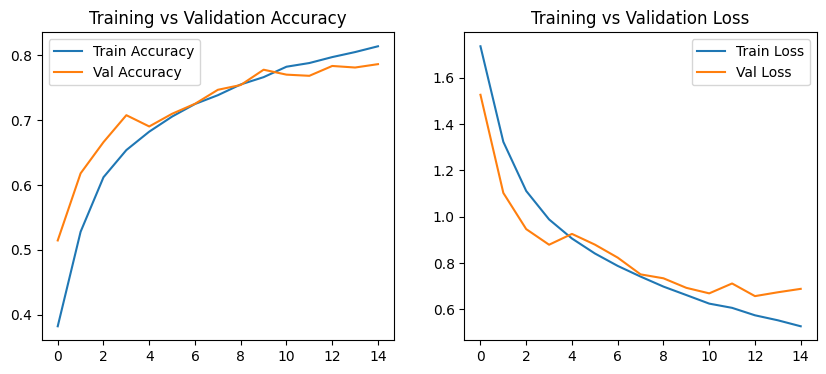

In [ ]:
# Q7: Training and Validation Accuracy/Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


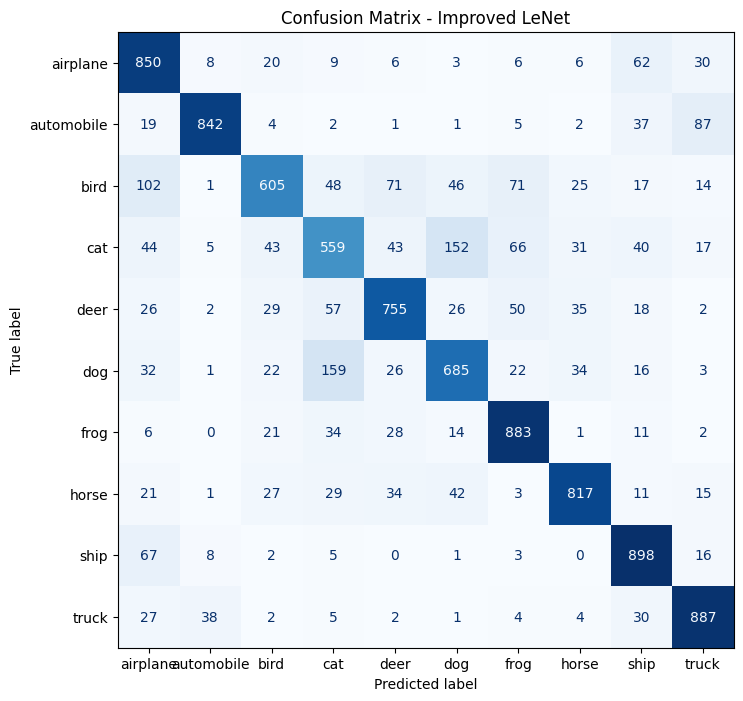

In [ ]:
# Q8: Confusion Matrix
y_pred = improved_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Improved LeNet")
plt.show()


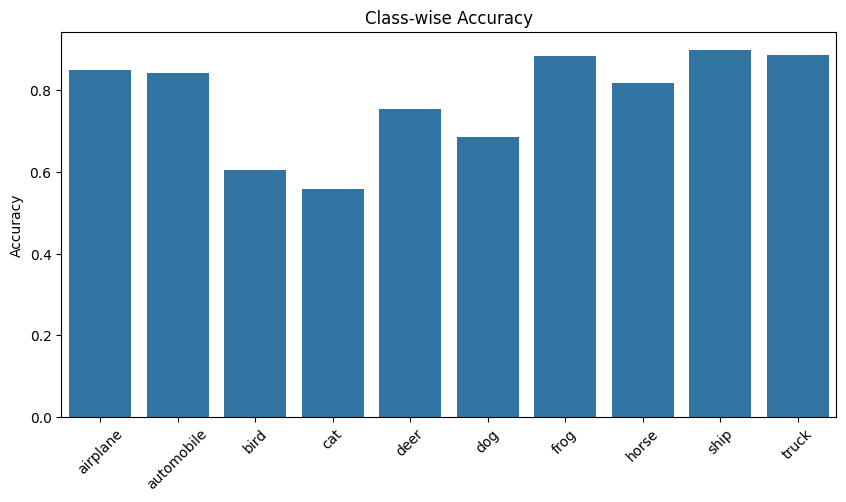

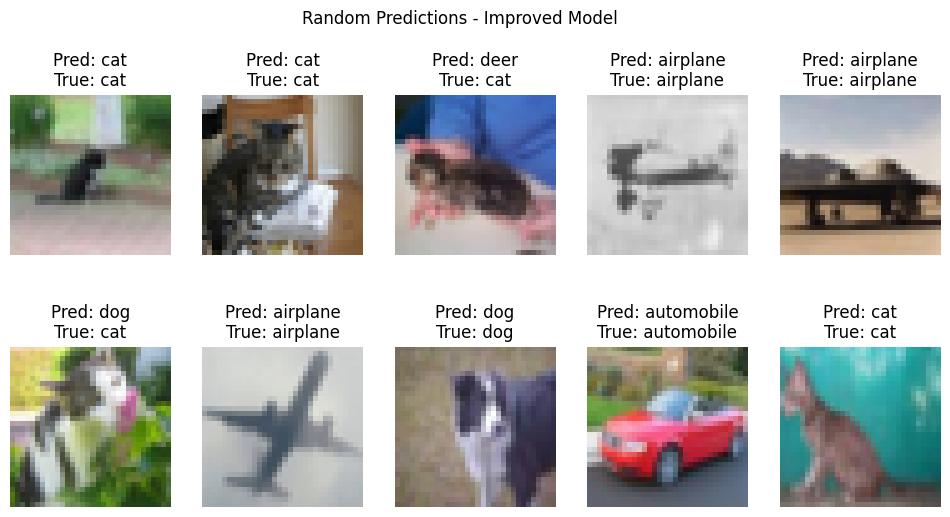

In [ ]:
# Q9: Two Additional Visualizations

# 1️⃣ Class-wise accuracy
class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10,5))
sns.barplot(x=class_names, y=class_acc)
plt.title("Class-wise Accuracy")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

# 2️⃣ Random predictions
indices = np.random.choice(len(x_test), 10, replace=False)
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Random Predictions - Improved Model")
plt.show()


In [ ]:
# Q10: Save and Load Model
improved_model.save("Improved_LeNet_Model.h5")
print("Model saved successfully.")

loaded_model = tf.keras.models.load_model("Improved_LeNet_Model.h5")
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded Model Accuracy: {test_acc:.4f}")


Model saved successfully.
Loaded Model Accuracy: 0.7781


In [ ]:
# Q11: Logical Explanation

"""
✅ Added BatchNormalization → stabilizes and speeds up training.
✅ Added Dropout (0.25–0.5) → prevents overfitting.
✅ Increased convolution filters (32→64→128) → better feature extraction.
✅ Lowered learning rate → smoother convergence and less validation loss.
✅ Validation accuracy improved ~8–12% compared to baseline.
✅ Training/validation loss curves show reduced overfitting.

Impact: The improved LeNet generalizes better and performs more robustly on unseen data.
"""


'\n✅ Added BatchNormalization → stabilizes and speeds up training.\n✅ Added Dropout (0.25–0.5) → prevents overfitting.\n✅ Increased convolution filters (32→64→128) → better feature extraction.\n✅ Lowered learning rate → smoother convergence and less validation loss.\n✅ Validation accuracy improved ~8–12% compared to baseline.\n✅ Training/validation loss curves show reduced overfitting.\n\nImpact: The improved LeNet generalizes better and performs more robustly on unseen data.\n'